<a href="https://colab.research.google.com/github/jlmbaka/kda-deep-learning-workshop-2020/blob/main/V3_fastai_02_download_KDA_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Démystification
Selon, vous avons-vous besoin des éléments ci-dessous pour le deep learning ?
1. Beaucoup de maths V / F
2. Beaucoup de données V / F
3. Beaucoup d'ordinateurs coûteux V / F
4. Un doctorat en intelligence artificielle V / F

## Réalité

1. Les mathématiques apprises à l'école secondaire suffisent
2. Des résultats records ont été obtenus parfois avec moins de 50 éléments de données
3. Vous pouvez obtenir gratuitement ce dont vous avez besoin pour faire la majorité de vos travaux en deep learning
4. Plus besoin d'avoir un doctorat grace aux différents packages mis à disposition différentes compagnies

## Deep Learning
- Le deep learning est une technique informatique permettant d'extraire et de transformer des données - avec des cas d'utilisation allant de la reconnaissance vocale humaine à la classification de l'imagerie animale - en utilisant plusieurs couches de réseaux neuronaux.
- Chacune de ces couches prend ses entrées des couches précédentes et les affine progressivement.
- Les couches sont entraînées par des algorithmes qui minimisent leurs erreurs et améliorent leur précision. De cette manière, le réseau apprend à exécuter une tâche spécifiée.

## Les logiciels: PyTorch, fastai, and Jupyter
- PyTorch: Librairie low-level publiée par Facebook
- Fastai: Librairie high-level construite au dessus de PyTorch
- Jupyter: Environnement intéractif qui nous permet d'écrire du code en Python et d'expérimenter


In [ ]:
!pip install fastai==1.0.42

     |████████████████████████████████| 163kB 3.3MB/s 
     |████████████████████████████████| 81kB 6.3MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp36-none-any.whl size=26307 sha256=ab16604bfafb7d2c3a15d342785e526a40244e9dece2d58efd40aa36dfe89c3b
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
Successfully built typing
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
pip freeze

absl-py==0.10.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.2.10
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.2.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.1.5
blis==0.4.1
bokeh==2.1.1
boto==2.49.0
boto3==1.14.59
botocore==1.17.59
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.1.1
catalogue==1.0.0
certifi==2020.6.20
cffi==1.14.2
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda101==7.4.0
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.3
Cython==0.29.21
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
debugpy==1.0.0rc2
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.2
distri

## Votre premier model

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

In [ ]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [ ]:
uploader = widgets.FileUpload()
uploader

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Est-ce un chat ?: {is_cat}.")
print(f"La probablité que c'est un chat: {probs[1].item():.6f}")

# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [ ]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

1. Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

2. Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

3. It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

4. You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

0. Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

1. In Google Chrome press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

2. You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server


Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [ ]:
src_list =[
    ('football', 'urls_football.csv'),
    ('basketball', 'urls_basketball.csv'),
    ('judo', 'urls_judo.csv'),
]

Loop through each category:
  - create the destination directory
  - upload csv files containing URLs

In [ ]:
path = Path('data/sports')
for folder, _ in src_list:
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

In [ ]:
!ls data/sports/

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving urls_judo.csv to urls_judo.csv
Saving urls_basketball.csv to urls_basketball.csv
Saving urls_football.csv to urls_football.csv
User uploaded file "urls_judo.csv" with length 32921 bytes
User uploaded file "urls_basketball.csv" with length 32921 bytes
User uploaded file "urls_football.csv" with length 32921 bytes


In [ ]:
!ls

data  sample_data  urls_basketball.csv	urls_football.csv  urls_judo.csv


In [ ]:
!mv *.csv data/sports

In [ ]:
!ls data/sports/

basketball  judo		 urls_football.csv
football    urls_basketball.csv  urls_judo.csv


In [ ]:
!rm -r data/sports/basketball

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [ ]:
for folder, file in src_list:
    dest = path/folder
    download_images(path/file, dest, max_pics=200)

In [ ]:
# If you have problems download, try with `max_workers=0` to see exceptions:
for _, file in src_list:
  download_images(path/file, dest, max_pics=20, max_workers=0)

In [ ]:
!ls data/sports/basketball

00000000.jpg  00000033.jpg  00000066.jpg  00000119.jpg	00000152.jpg
00000001.jpg  00000034.jpg  00000067.jpg  00000120.jpg	00000153.jpg
00000002.jpg  00000035.jpg  00000068.jpg  00000121.jpg	00000154.jpg
00000003.jpg  00000036.jpg  00000069.jpg  00000122.jpg	00000155.jpg
00000004.jpg  00000037.jpg  00000070.jpg  00000123.jpg	00000156.jpg
00000005.jpg  00000038.jpg  00000071.jpg  00000124.jpg	00000157.jpg
00000006.jpg  00000039.jpg  00000072.jpg  00000125.jpg	00000158.jpg
00000007.jpg  00000040.jpg  00000073.jpg  00000126.jpg	00000159.jpg
00000008.jpg  00000041.jpg  00000074.jpg  00000127.jpg	00000160.jpg
00000009.jpg  00000042.jpg  00000075.jpg  00000128.jpg	00000161.jpg
00000010.jpg  00000043.jpg  00000076.jpg  00000129.jpg	00000162.jpg
00000011.jpg  00000044.jpg  00000077.jpg  00000130.jpg	00000163.jpg
00000012.jpg  00000045.jpg  00000078.jpg  00000131.jpg	00000164.jpg
00000013.jpg  00000046.jpg  00000079.jpg  00000132.jpg	00000165.jpg
00000014.jpg  00000047.jpg  00000100.jpg  000001

Then we can remove any images that can't be opened:

In [ ]:
classes = [class_name for class_name, folder in src_list]
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

football


basketball


judo


Image data/sports/judo/00000023.jpg has 1 instead of 3 channels


## View data

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(
    path, 
    train=".", 
    valid_pct=0.2,
    ds_tfms=get_transforms(), 
    size=224, 
    num_workers=4).normalize(imagenet_stats)

You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:226: UserWarning: There seems to be something wrong with your dataset, can't access these elements in self.train_ds: 329,297,25,309,68...
  warn(warn_msg)


In [ ]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [ ]:
data.classes

['basketball', 'football', 'judo']

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

AttributeError: ignored

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['basketball', 'football', 'judo'], 3, 480, 120)

## Train model

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
                  

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.556449,0.386024,0.125000,00:05
1,0.868024,0.199944,0.050000,00:05
2,0.603501,0.155198,0.050000,00:05
3,0.478056,0.170917,0.050000,00:05


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


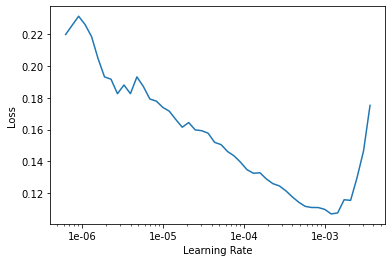

In [ ]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.169328,0.165811,0.058333,00:06
1,0.154963,0.154323,0.058333,00:06


In [ ]:
learn.save('stage-2')

## Interpretation

In [ ]:
learn.load('stage-1');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

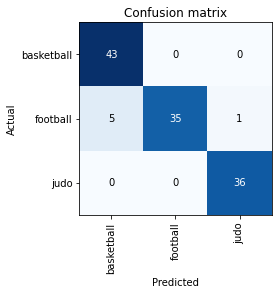

In [ ]:
interp.plot_confusion_matrix()

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [ ]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

In [ ]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [ ]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .split_none()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

Then we create a new learner to use our new databunch with all the images.

In [ ]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-1');

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).

In [ ]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())


If the code above does not show any GUI(contains images and buttons) rendered by widgets but only text output, that may caused by the configuration problem of ipywidgets. Try the solution in this [link](https://github.com/fastai/fastai/issues/1539#issuecomment-505999861) to solve it.


Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

Make sure to recreate the databunch and `learn_cln` from the `cleaned.csv` file. Otherwise the file would be overwritten from scratch, losing all the results from cleaning the data from toplosses.

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [ ]:
ImageCleaner(ds, idxs, path, duplicates=True)

'No images to show :)'

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [ ]:
learn.export()

In [ ]:
!ls data/sports

basketball   export.pkl  judo	 urls_basketball.csv  urls_judo.csv
cleaned.csv  football	 models  urls_football.csv


In [ ]:
!mv data/sports/export.pkl gdrive/My\ Drive/kda_fastai

In [ ]:
!ls gdrive/My\ Drive/kda_fastai

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [ ]:
defaults.device = torch.device('cpu')

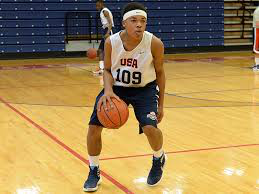

In [ ]:
img = open_image(path/'basketball'/'00000021.jpg')
img

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [ ]:
learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'basketball'

In [ ]:
pred_class

Category tensor(2)

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

Deployez votre model dans une web app avec Render

1. Exporter le model que nous avons entrainé précédement
2. Upload le model sur une plareform cloud et noter l'URL
  - Google Drive: Use this [link generator](https://www.wonderplugin.com/online-tools/google-drive-direct-link-generator/)
  - Dropbox: Use this [link generator](https://syncwithtech.blogspot.com/p/direct-download-link-generator.html)
3. Forker et cloner ce [template](https://github.com/render-examples/fastai-v3)
4. Modifier le template:
  - Modifiez le fichier `server.py` dans le répertoire` app` et mettez à jour la variable `model_file_url` avec l'URL copiée ci-dessus.
  - Dans le même fichier, mettez à jour la ligne `classes = ['black', 'grizzly', 'teddys']` avec les classes que vous attendez de votre modèle.
  - Faire un commit des changements effectués
5. Créer un compte sur [Render](render.com)
6. Deployer l'application sur Render
  - Créez un nouveau **Web Service** sur Render et utilisez le dépôt que vous avez créé ci-dessus. Vous devrez accorder l'autorisation Render pour accéder à votre dépôt à cette étape.

  - Sur l'écran de déploiement, choisissez un nom pour votre service et utilisez `Docker` pour l'environnement.

  - Cliquez sur **Save Web Service***. C'est tout! Votre service commencera à se développer et devrait être opérationnel dans quelques minutes à l'URL affichée dans votre tableau de bord Render. Vous pouvez suivre sa progression dans les journaux de déploiement.


## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(1, max_lr=0.5)

Total time: 00:13
epoch  train_loss  valid_loss  error_rate       
1      12.220007   1144188288.000000  0.765957    (00:13)



### Learning rate (LR) too low

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [ ]:
learn.fit_one_cycle(5, max_lr=1e-5)

Total time: 01:07
epoch  train_loss  valid_loss  error_rate
1      1.349151    1.062807    0.609929    (00:13)
2      1.373262    1.045115    0.546099    (00:13)
3      1.346169    1.006288    0.468085    (00:13)
4      1.334486    0.978713    0.453901    (00:13)
5      1.320978    0.978108    0.446809    (00:13)



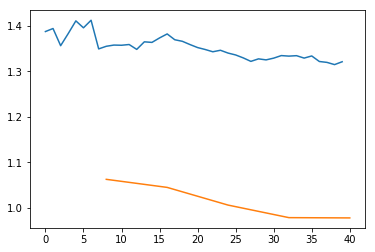

In [ ]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [ ]:
learn.fit_one_cycle(1)

Total time: 00:14
epoch  train_loss  valid_loss  error_rate
1      0.602823    0.119616    0.049645    (00:14)



### Too many epochs

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

Total time: 06:39
epoch  train_loss  valid_loss  error_rate
1      1.513021    1.041628    0.507326    (00:13)
2      1.290093    0.994758    0.443223    (00:09)
3      1.185764    0.936145    0.410256    (00:09)
4      1.117229    0.838402    0.322344    (00:09)
5      1.022635    0.734872    0.252747    (00:09)
6      0.951374    0.627288    0.192308    (00:10)
7      0.916111    0.558621    0.184982    (00:09)
8      0.839068    0.503755    0.177656    (00:09)
9      0.749610    0.433475    0.144689    (00:09)
10     0.678583    0.367560    0.124542    (00:09)
11     0.615280    0.327029    0.100733    (00:10)
12     0.558776    0.298989    0.095238    (00:09)
13     0.518109    0.266998    0.084249    (00:09)
14     0.476290    0.257858    0.084249    (00:09)
15     0.436865    0.227299    0.067766    (00:09)
16     0.457189    0.236593    0.078755    (00:10)
17     0.420905    0.240185    0.080586    (00:10)
18     0.395686    0.255465    0.082418    (00:09)
19     0.373232    0.2